## Observations and Insights 

In [34]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "Mouse_metadata.csv"
study_results_path = "Study_results.csv"

# Read the mouse data and the study results
mouse_metadata_df = pd.read_csv(mouse_metadata_path)
study_results_df = pd.read_csv(study_results_path)

In [35]:
mouse_metadata_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [36]:
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [37]:
# Combine the data into a single dataset

merged_df = pd.merge(study_results_df, mouse_metadata_df, on="Mouse ID")


In [38]:
# Display the data table for preview
merged_df.head(100)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22
...,...,...,...,...,...,...,...,...
95,x930,25,53.726101,0,Naftisol,Male,13,26
96,o725,0,45.000000,0,Naftisol,Male,4,26
97,o725,5,46.889821,0,Naftisol,Male,4,26
98,o725,10,48.199452,0,Naftisol,Male,4,26


In [39]:
# Checking the number of mice.

mice_count = mouse_metadata_df['Mouse ID'].count()
mice_count

249

In [44]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 
#mice_count2 = study_results_df.loc["Mouse ID"]
#mice_count2

duplicate_mouse_ids = merged_df.loc[merged_df.duplicated(subset=['Mouse ID', 'Timepoint']),'Mouse ID'].unique()
duplicate_mouse_ids

array(['g989'], dtype=object)

In [60]:
# Optional: Get all the data for the duplicate mouse ID. 

duplicate_df = merged_df.loc[merged_df["Mouse ID"]=="g989"]
duplicate_df

# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 


,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [68]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.

clean_merged_df = merged_df.loc[merged_df["Mouse ID"].isin(duplicate_mouse_ids)==False]
clean_merged_df.tail(20)

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
1873,m957,25,37.695432,1,Capomulin,Female,3,19
1874,m957,30,38.212479,1,Capomulin,Female,3,19
1875,m957,35,32.562839,1,Capomulin,Female,3,19
1876,m957,40,32.947615,1,Capomulin,Female,3,19
1877,m957,45,33.329098,1,Capomulin,Female,3,19
1878,f966,0,45.000000,0,Capomulin,Male,16,17
1879,f966,5,38.796474,0,Capomulin,Male,16,17
1880,f966,10,35.624403,0,Capomulin,Male,16,17
1881,f966,15,32.623003,0,Capomulin,Male,16,17
1882,f966,20,30.485985,0,Capomulin,Male,16,17


In [70]:
# Checking the number of mice in the clean DataFrame.

merged_count = clean_merged_df["Mouse ID"].nunique()
merged_count

248

'## Summary Statistics

In [78]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# This method is the most straighforward, creating multiple series and putting them all together at the end.


tumor_mean = clean_merged_df.groupby(["Drug Regimen"]).mean()["Tumor Volume (mm3)"]
tumor_median = clean_merged_df.groupby(["Drug Regimen"]).median()["Tumor Volume (mm3)"]
tumor_var = clean_merged_df.groupby(["Drug Regimen"]).var()["Tumor Volume (mm3)"]
tumor_std = clean_merged_df.groupby(["Drug Regimen"]).std()["Tumor Volume (mm3)"]
tumor_sem = clean_merged_df.groupby(["Drug Regimen"]).sem()["Tumor Volume (mm3)"]





summary_tumor_table_df = pd.DataFrame({"Tumor Volume Mean":tumor_mean, "Tumor Median":tumor_median, "Tumor Variance":tumor_var, "Tumor STD": tumor_std, "Tumor SEM": tumor_sem})


summary_tumor_table_df

,Tumor Volume Mean,Tumor Median,Tumor Variance,Tumor STD,Tumor SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.320930,50.446266,43.852013,6.622085,0.544332
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [94]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# This method produces everything in a single groupby function
summary_tumor_table_df = clean_merged_df.groupby("Drug Regimen").agg({"Tumor Volume (mm3)":["mean", "median", "var","std","sem"]})
summary_tumor_table_df

Tumor Volume (mm3)                                          
                           mean     median        var       std       sem
Drug Regimen                                                             
Capomulin             40.675741  41.557809  24.947764  4.994774  0.329346
Ceftamin              52.591172  51.776157  39.290177  6.268188  0.469821
Infubinol             52.884795  51.820584  43.128684  6.567243  0.492236
Ketapril              55.235638  53.698743  68.553577  8.279709  0.603860
Naftisol              54.331565  52.509285  66.173479  8.134708  0.596466
Placebo               54.033581  52.288934  61.168083  7.821003  0.581331
Propriva              52.320930  50.446266  43.852013  6.622085  0.544332
Ramicane              40.216745  40.673236  23.486704  4.846308  0.320955
Stelasyn              54.233149  52.431737  59.450562  7.710419  0.573111
Zoniferol             53.236507  51.818479  48.533355  6.966589  0.516398

## Bar and Pie Charts

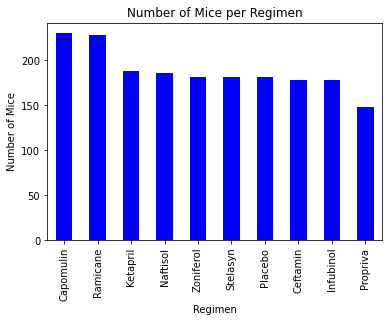

In [133]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pandas. 

mice_in_regiment = clean_merged_df["Drug Regimen"].value_counts()


plt.title("Number of Mice per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")

mice_in_regiment.plot(kind="bar",x="Drug Regimen", y="Value Counts", label="Total Mice per Drug Regimen", color="b")



<BarContainer object of 10 artists>

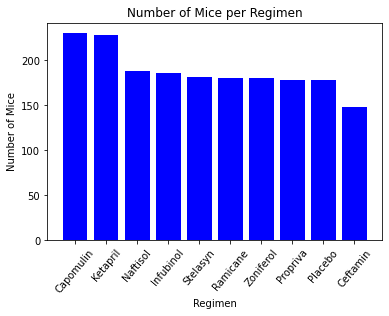

In [139]:
# Generate a bar plot showing the total number of mice for each treatment throughout the course of the study using pyplot.

mouse_bar_plt = clean_merged_df['Drug Regimen'].unique()

plt.title("Number of Mice per Regimen")
plt.xlabel("Regimen")
plt.ylabel("Number of Mice")
plt.xticks(rotation= 50)
plt.bar(mouse_bar_plt, height = mice_in_regiment, label = "Total Mice per Drug Regimen", color="b")

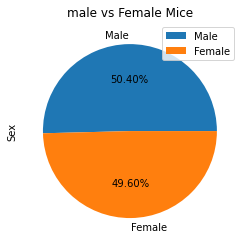

In [157]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

mice_sex = clean_merged_df.drop_duplicates(subset= ['Mouse ID'])
mice_sex = mice_sex['Sex'].value_counts()



plt.title("male vs Female Mice")
mice_sex.plot.pie(autopct='%1.2f%%')

plt.legend()
plt.show()

ValueError: incomplete format

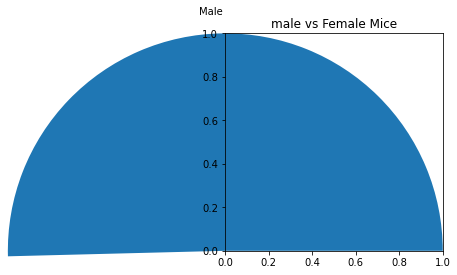

In [165]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot


labels= 'Male', 'Female'
sizes= mice_sex

fig1, ax1 = plt.subplots()
plt.title("male vs Female Mice")
ax1.pie(sizes, labels=labels, autopct= '%1.1f%')
ax1.axis('equal')




## Quartiles, Outliers and Boxplots

In [163]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse

max_tumor = clean_merged_df.groupby(["Mouse ID"])["Timepoint"].max()
max_tumor = max_tumor.reset_index()

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint


merged_max_df = max_tumor.merge(clean_merged_df,on=["Mouse ID","Timepoint"],how="left")


In [177]:
# Put treatments into a list for for loop (and later for plot labels)

drug_list = ["Capomulin","Ramicane","Infubinol","Ceftamin"]


# Create empty list to fill with tumor vol data (for plotting)

tumor_vol_data = []


# Calculate the IQR and quantitatively determine if there are any potential outliers. 

for drug in drug_list:
    
    #create dataset for each drug as you go through; add to tumor vol data list
    final_tumor_vol = merged_df.loc[merged_df["Drug Regimen"]==drug,"Tumor Volume (mm3)"]
    tumor_vol_data.append(final_tumor_vol)

    # Locate the rows which contain mice on each drug and get the tumor volumes
    merged_max_sort = merged_max_df.groupby(['Drug Regimen','Mouse ID']).last()['Tumor Volume (mm3)']
    merged_max_df = merged_max_sort.to_frame()
    merged_max_df
    
    
    
    
    # add subset 
    
    
    # Determine outliers using upper and lower bounds
    
    quartiles = final_tumor_vol.quantile([.25,.5,.75])
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    
    iqr = upperq-lowerq
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)
    
    outliers = final_tumor_vol.loc[(final_tumor_vol<lower_bound)|(final_tumor_vol>upper_bound)]
    print(drug)
    print(outliers)
    
    

Capomulin
1699    25.472143
1700    23.343598
Name: Tumor Volume (mm3), dtype: float64
Ramicane
514    22.050126
Name: Tumor Volume (mm3), dtype: float64
Infubinol
Series([], Name: Tumor Volume (mm3), dtype: float64)
Ceftamin
Series([], Name: Tumor Volume (mm3), dtype: float64)


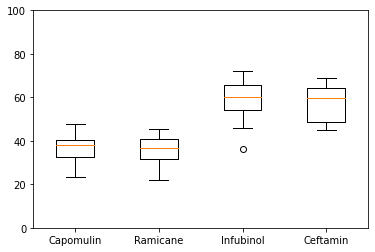

<function matplotlib.pyplot.tight_layout(pad=1.08, h_pad=None, w_pad=None, rect=None)>

In [181]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest


boxplot_df =merged_max_df.reset_index()
tumor_vol_list = boxplot_df.groupby('Drug Regimen')['Tumor Volume (mm3)'].apply(list)
tumor_vol_list_df = pd.DataFrame(tumor_vol_list)
tumor_vol_list_df = tumor_vol_list_df.reindex(drug_list)
tumor_volume_loop = [vol for vol in tumor_vol_list_df['Tumor Volume (mm3)']]
plt.boxplot(tumor_volume_loop, labels = drug_list)
plt.ylim(0,100)
plt.show()
plt.tight_layout

## Line and Scatter Plots

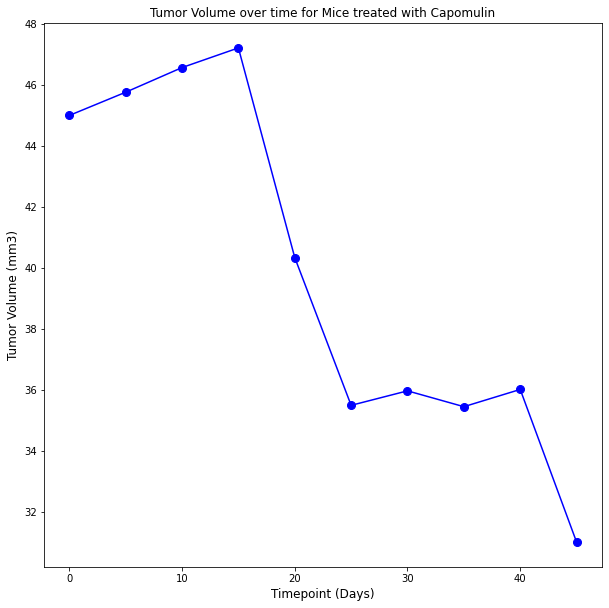

In [166]:
# Generate a line plot of time point versus tumor volume for a mouse treated with Capomulin

capline = clean_merged_df.loc[clean_merged_df['Mouse ID'] == "u364"]
x_axis = capline['Timepoint']
y_axis = capline['Tumor Volume (mm3)']
fig1, ax1 = plt.subplots(figsize=(10, 10))
plt.title('Tumor Volume over time for Mice treated with Capomulin',fontsize= 12)
plt.plot(x_axis, y_axis, markersize= 8, marker= "o",color= "b")
plt.xlabel('Timepoint (Days)',fontsize= 12)
plt.ylabel('Tumor Volume (mm3)',fontsize= 12)
plt.show()

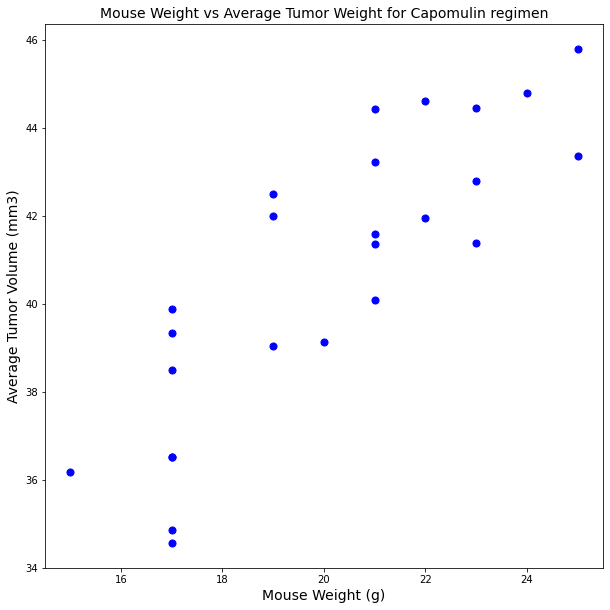

In [169]:
# Generate a scatter plot of mouse weight versus average tumor volume for the Capomulin regimen


capomulin_df = (clean_merged_df.loc[clean_merged_df['Drug Regimen'] == "Capomulin"]).groupby(['Mouse ID'])
weight = capomulin_df['Weight (g)'].mean()


#tumor_mean

average_tumor_volume = capomulin_df['Tumor Volume (mm3)'].mean()



fig1, ax1 = plt.subplots(figsize= (10, 10))
plt.title("Mouse Weight vs Average Tumor Weight for Capomulin regimen",fontsize= 14)
plt.scatter(weight, average_tumor_volume, s= 50,color= "b")
plt.xlabel('Mouse Weight (g)',fontsize= 14)
plt.ylabel('Average Tumor Volume (mm3)',fontsize= 14)
plt.show()

## Correlation and Regression

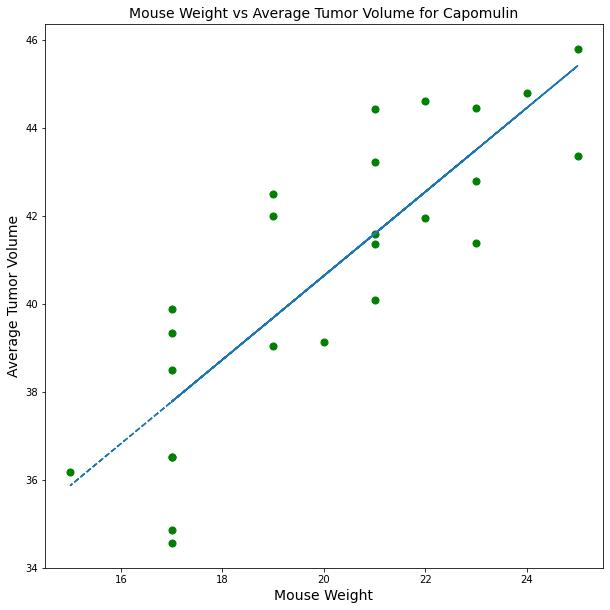

The line equation is y = 0.95x + 21.55.
The correlation coefficient is 0.8419363424694718.
The coefficient of determination (r-squared) is 0.7088568047708717.


In [172]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

# Perform a linear regression on mouse weight versus average tumor volume for the Capomulin regimen



capomulin_slope, capomulin_int, capomulin_r, capomulin_p, capomulin_std_error = st.linregress(weight, average_tumor_volume)

# Create equation of line to calculate predicted average tumor volume

capomulin_fit = capomulin_slope * weight + capomulin_int
fig1, ax1 = plt.subplots(figsize= (10, 10))

plt.title("Mouse Weight vs Average Tumor Volume for Capomulin",fontsize= 14)
line_eq = "y = " + str(round(capomulin_slope,2)) + "x + " + str(round(capomulin_int,2))
plt.scatter(weight, average_tumor_volume, s= 50,color= "g")
plt.plot(weight, capomulin_fit, "--")
plt.xlabel('Mouse Weight',fontsize= 14)
plt.ylabel('Average Tumor Volume',fontsize= 14)
plt.show()



print(f"The line equation is {line_eq}.")
print(f"The correlation coefficient is {capomulin_r}.")
print(f"The coefficient of determination (r-squared) is {capomulin_r**2}.")


In [ ]:


#Observations

#Capomulin appears to be affective in mice after the time of around 15 and sharplyu drops the tumor volume by the 20th timepoint
#Mouse weight is positivly corrected with tumor volume
#The study was done on roughly the equal amount of female and male mice
#Of the 4 top drugs Ifubinol was the only regimen to have an outlier